<a href="https://colab.research.google.com/github/saikiran2804/Doctor-Visit-Analysis/blob/main/Doctor_visit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Read the dataset

In [ ]:
df = pd.read_csv("DoctorVisits - DA.csv")

In [ ]:
df.head(15)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


# Display complete information about the columns of the dataset such as column name,Datatype and overall memory size

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# find out total no: of people based on their count of illeness

In [ ]:
df["illness"].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [ ]:
df["gender"].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

# Visualize and analyse the maximum, minimum and medium income

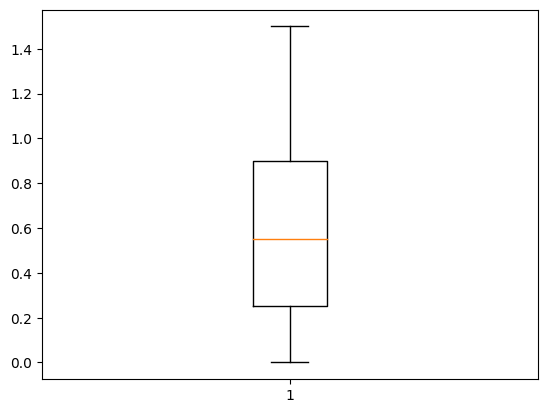

In [ ]:
y = list(df.income)
plt.boxplot(y)
plt.show()

# Find out the no of days of reduced activity of male and female separately due to illenes

In [ ]:
df['reduced'] = df['reduced'].map({'yes': 1, 'no': 0})

# Visualize is there is any missing value in the dataset based on a heat map

<Axes: >

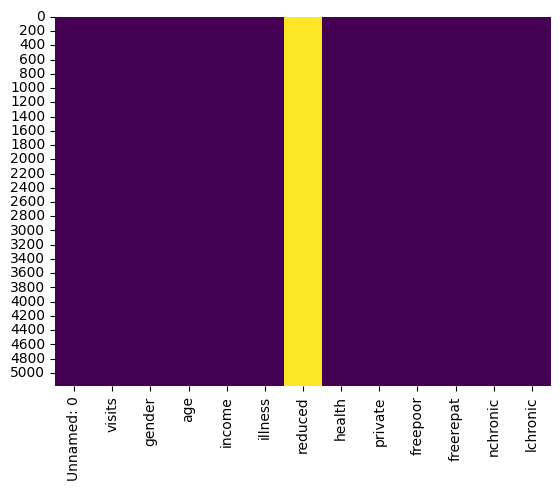

In [ ]:
#missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

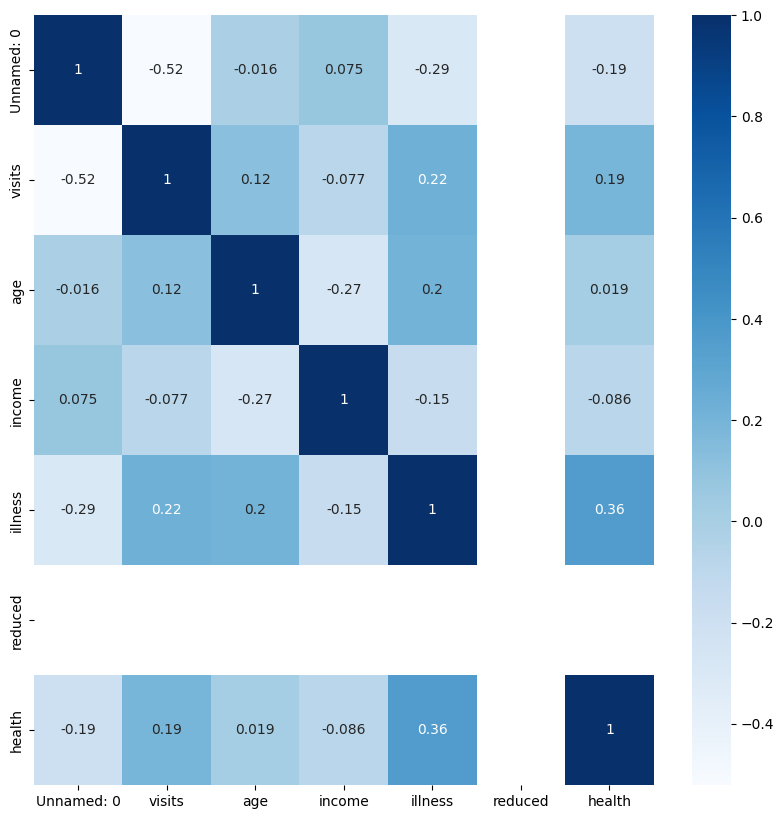

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cbar=True, annot=True, cmap='Blues')
plt.show()

# Find out the correlation between variables in the given dataset correlation between different variables

# Analyse how the income of a patient affects the no of visits to the hospital

Text(0, 0.5, 'visits')

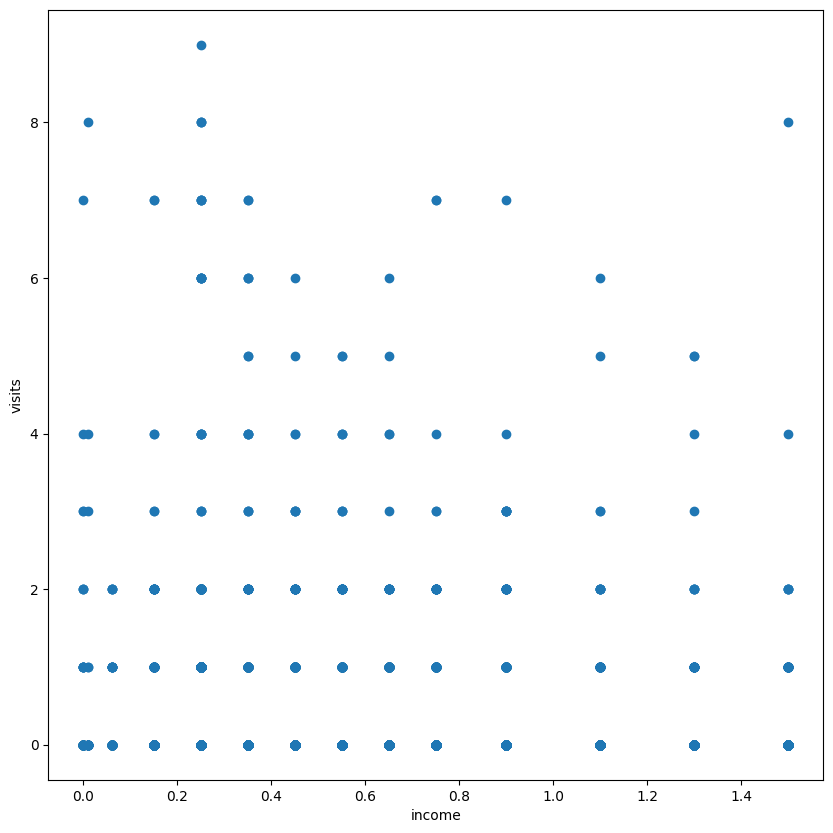

In [ ]:
#relation between income and visits
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and visualize the number of males and females affected by illness

<Axes: xlabel='gender', ylabel='Count'>

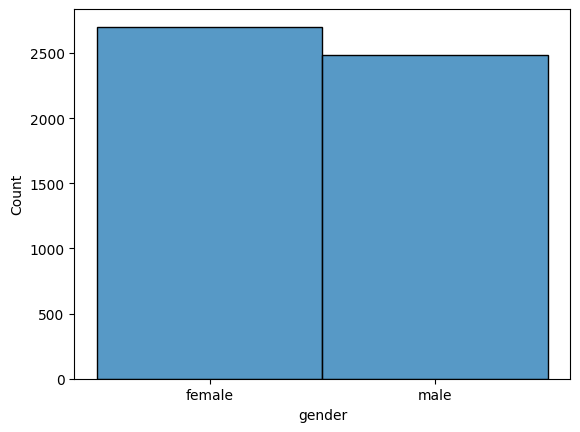

In [ ]:
#No:of male and female affected by illness
sns.histplot(df.gender,bins=2)

# Visualize the percentage of people getting govt health insurance due to low income, due to old age and also the percentage of people having private health insurance

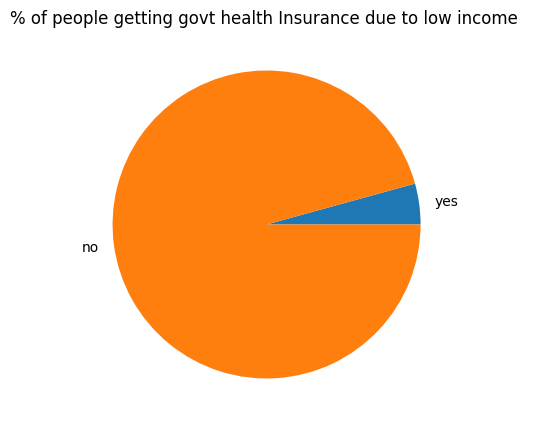

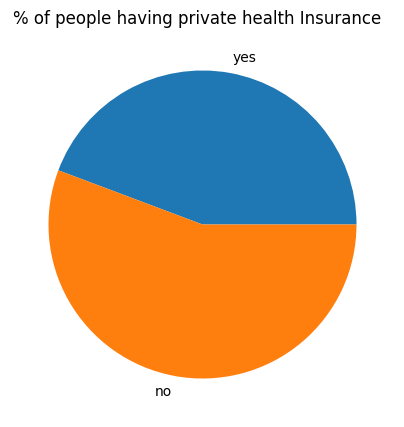

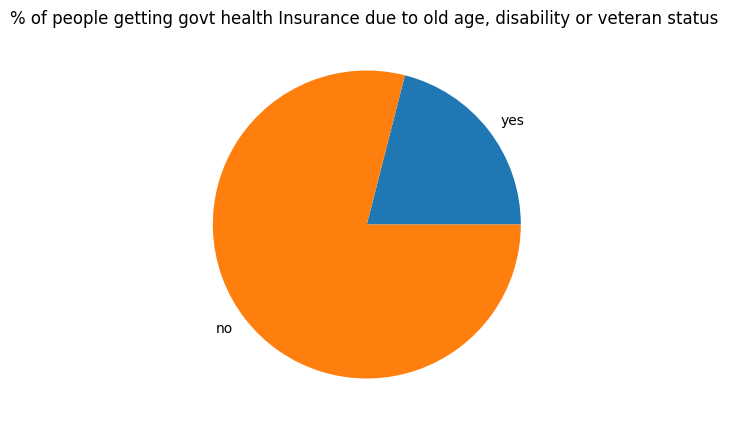

In [ ]:
# %of people getting govt Insurance due to low income
label=['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income ")
plt.show()
# % of people having private Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people having private health Insurance  ")
plt.show()
# % of people getting govt Insurance due ro old age, disability or veteran status
Y = df[df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status ")
plt.show()

# Plot a horizontal bar chart to analyze the reduced days of activity due to illness based on Gender

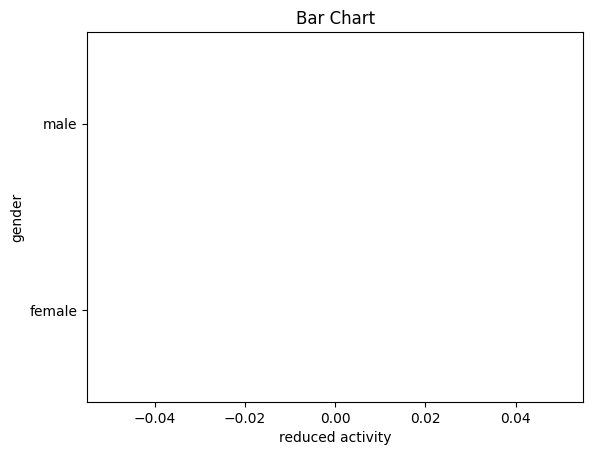

In [ ]:
db= df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#Creating the bar chart
plt.barh(db['gender'],db['reduced'],color = ['cornflowerblue','lightseagreen'])
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('reduced activity')
plt.ylabel('gender')
#show the plot
plt.show()

In [ ]:
print(df.dtypes)

Unnamed: 0      int64
visits          int64
gender         object
age           float64
income        float64
illness         int64
reduced       float64
health          int64
private        object
freepoor       object
freerepat      object
nchronic       object
lchronic       object
dtype: object


In [ ]:
df['reduced'] = df['reduced'].map({'yes': 1, 'no': 0})

In [ ]:
df.groupby(['gender', 'reduced']).mean()

,,Unnamed: 0,visits,age,income,illness,health,private,freepoor,freerepat,nchronic,lchronic
gender,reduced,,,,,,,,,,,


In [ ]:
import pandas as pd

# Sample data
data = {
    'gender': ['male', 'female', 'female', 'male', 'male', 'female'],
    'reduced': ['yes', 'no', 'yes', 'no', 'yes', 'no'],
    'age': [23, 25, 22, 24, 30, 28],
    'income': [50000, 60000, 55000, 45000, 70000, 65000]
}

df = pd.DataFrame(data)

# Inspect data types
print(df.dtypes)

# Convert 'reduced' column to numeric
df['reduced'] = df['reduced'].map({'yes': 1, 'no': 0})

# Group by 'gender' and 'reduced', then calculate the mean
grouped_df = df.groupby(['gender', 'reduced']).mean()
print(grouped_df)

gender     object
reduced    object
age         int64
income      int64
dtype: object
                 age   income
gender reduced               
female 0        26.5  62500.0
       1        22.0  55000.0
male   0        24.0  45000.0
       1        26.5  60000.0
